### EDA: Trực quan hóa và phân phối điểm theo môn, tổ hợp và năm

In [15]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

In [ ]:
import sys
import os

# 1. Lấy đường dẫn của thư mục 'Notebook'
current_dir = os.getcwd() 

# 2. Lấy đường dẫn của thư mục Project_Root (Thư mục cha của 'Notebook' và 'Module')
# Đây là thư mục Project_Root/
project_root_dir = os.path.dirname(current_dir)

# 3. Thêm Project_Root vào sys.path
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)
    
print(f"Đã thêm đường dẫn gốc: {project_root_dir}")

# Lệnh import này sẽ hoạt động sau khi thêm Project_Root vào sys.path
from Module.Load_Data import DataLoader
from Module.Processor_Data import DataProcessor
from Module.Analysis import Analysis

Đã thêm đường dẫn gốc: c:\Users\Admin\OneDrive\Máy tính\Code\Project Python for Data\PythonProject


## Chọn môn học:

In [31]:
# Xây dựng Map chọn môn học
subject_map = {
    1: "toan",
    2: "ngu_van",
    3: "vat_li",
    4: "hoa_hoc",
    5: "sinh_hoc",
    6: "tin_hoc",
    7: "cn_cong_nghiep",
    8: "cn_nong_nghiep",
    9: "lich_su",
    10: "dia_li",
    11: "gdcd",
    12: "ngoai_ngu",
    13: "ma_ngoai_ngu"
}

print("=== Danh sách môn học ===")
for k, v in subject_map.items():
    print(f"{k}: {v}")

choice = int(input("\nNhập số môn bạn muốn chọn: "))

if choice in subject_map:
    print("Bạn đã chọn:", subject_map[choice])
else:
    print("❌ Không hợp lệ")


=== Danh sách môn học ===
1: toan
2: ngu_van
3: vat_li
4: hoa_hoc
5: sinh_hoc
6: tin_hoc
7: cn_cong_nghiep
8: cn_nong_nghiep
9: lich_su
10: dia_li
11: gdcd
12: ngoai_ngu
13: ma_ngoai_ngu
Bạn đã chọn: vat_li


In [32]:
proc = DataProcessor()

# Gọi pipeline xử lý rồi lấy dữ liệu
proc.process_all()
df = proc.get_processed_data()
    
# Phân tích dữ liệu
analysis = Analysis(proc)
ChoiceSubj_df = analysis.get_arregate_by_exam_subsections(subject=subject_map[choice])
ChoiceSubj = subject_map[choice]

In [33]:
mask_2025 = df["nam_hoc"] == 2025
mask_ChoiceSubj = df[subject_map[choice]].notna()

df_2025 = df.loc[mask_2025]
so_all_2025 = df_2025.shape[0]

so_ChoiceSubj_2025 = df_2025.loc[mask_ChoiceSubj].shape[0]
# hoặc:
# so_li_2025 = (mask_2025 & mask_li).sum()

print("Tổng HS năm 2025:", so_all_2025)
print(f"HS có điểm {ChoiceSubj} năm 2025:", so_ChoiceSubj_2025)


Tổng HS năm 2025: 1153226
HS có điểm vat_li năm 2025: 351733


In [34]:
# Set Pivot Table để dễ nhìn
ChoiceSubj_23 = ChoiceSubj_df[ChoiceSubj_df["nam_hoc"].isin([2023])].pivot_table(
    index="nam_hoc",
    columns="diem",
    values="so_hoc_sinh",
    fill_value=0,
).squeeze()
    
ChoiceSubj_24 = ChoiceSubj_df[ChoiceSubj_df["nam_hoc"].isin([2024])].pivot_table(
    index="nam_hoc",
    columns="diem",
    values="so_hoc_sinh",
    fill_value=0,
).squeeze()
    
ChoiceSubj_25 = ChoiceSubj_df[ChoiceSubj_df["nam_hoc"] == 2025].pivot_table(
    index="nam_hoc",
    columns="diem",
    values="so_hoc_sinh",
    fill_value=0,
).squeeze()
    

In [35]:
print(ChoiceSubj_23)


diem
0.00        10.0
0.25         1.0
0.50         2.0
0.75         2.0
1.00         8.0
1.25        15.0
1.50        59.0
1.75       130.0
2.00       254.0
2.25       429.0
2.50       805.0
2.75      1229.0
3.00      1776.0
3.25      2789.0
3.50      3672.0
3.75      4852.0
4.00      6019.0
4.25      7419.0
4.50      8771.0
4.75     10138.0
5.00     11317.0
5.25     12664.0
5.50     13693.0
5.75     15147.0
6.00     16259.0
6.25     17447.0
6.50     18523.0
6.75     19523.0
7.00     20599.0
7.25     21129.0
7.50     21554.0
7.75     21207.0
8.00     19844.0
8.25     17351.0
8.50     13561.0
8.75      9287.0
9.00      5308.0
9.25      2822.0
9.50      1136.0
9.75       368.0
10.00       70.0
Name: 2023, dtype: float64


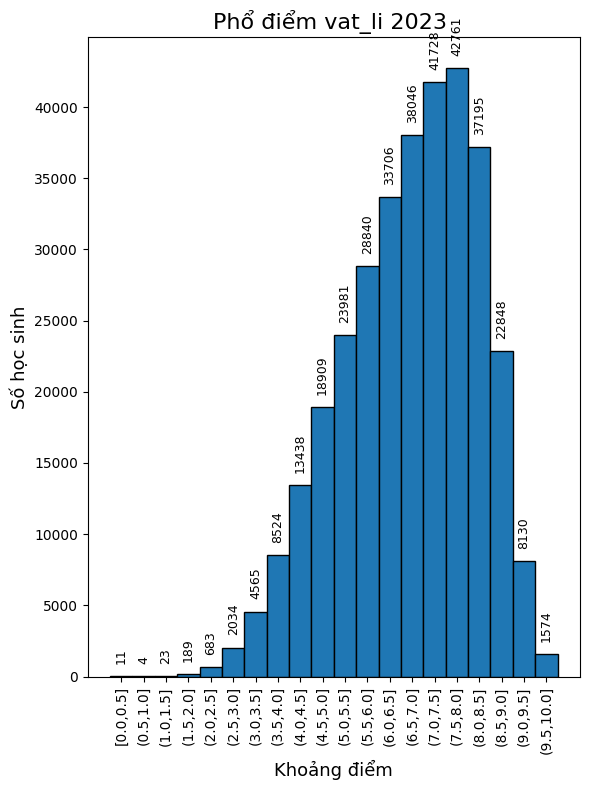

In [37]:
# 1. Mở rộng dữ liệu thô từ Series (index = điểm, values = số lượng)
points = np.repeat(ChoiceSubj_23.index.values, ChoiceSubj_23.values.astype(int))

# 2. Tạo edges để có khoảng: [0,0.5], (0.5,1], ..., (9.5,10]
# hist sẽ hiểu là [a,b) trừ bin cuối, nên mình dịch bin đầu hơi âm
edges = np.concatenate((
    np.array([-1e-6, 0.5]),   # ~ [0,0.5]
    np.arange(1, 10.5, 0.5)   # 1, 1.5, 2, ..., 10
))

# 3. Tạo edges để HIỂN THỊ (không để -1e-6 trong label)
display_edges = edges.copy()
display_edges[0] = 0.0   # hiển thị từ 0

# 4. Tạo label dạng [0,0.5], (0.5,1], ...
labels = []
labels.append(f"[{display_edges[0]},{display_edges[1]}]")   # bin đầu

for i in range(1, len(display_edges) - 1):
    labels.append(f"({display_edges[i]},{display_edges[i+1]}]")

# 5. Tính tần suất theo bins & vẽ BAR
plt.figure(figsize=(6, 8))

# Thay vì plt.hist → dùng np.histogram để tự vẽ bar
n, bin_edges = np.histogram(points, bins=edges)

# Tâm mỗi bin để đặt cột
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
widths = np.diff(bin_edges)

plt.bar(centers, n, width=widths, edgecolor="black")

plt.title(f"Phổ điểm {ChoiceSubj} 2023 ", fontsize=16)
plt.xlabel("Khoảng điểm", fontsize=13)
plt.ylabel("Số học sinh", fontsize=13)

# 6. Set tick theo tâm mỗi bin + label dạng [ ], ( ]
plt.xticks(centers, labels, rotation=90)

# 7. Ghi số lượng lên từng cột (xoay 90°, value nguyên)
for x, count in zip(centers, n):
    if count == 0:
        continue
    y = count
    plt.text(
        x,
        y + max(n) * 0.02,
        str(int(count)),
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


In [38]:

print(ChoiceSubj_24)


diem
0.00         4.0
0.25         1.0
0.50         2.0
0.75        11.0
1.00        31.0
1.25        57.0
1.50       152.0
1.75       356.0
2.00       605.0
2.25      1000.0
2.50      1518.0
2.75      2263.0
3.00      2993.0
3.25      3982.0
3.50      4833.0
3.75      5748.0
4.00      6948.0
4.25      7745.0
4.50      8580.0
4.75      9659.0
5.00     10432.0
5.25     11147.0
5.50     11909.0
5.75     12852.0
6.00     13597.0
6.25     14618.0
6.50     15769.0
6.75     17294.0
7.00     19005.0
7.25     21122.0
7.50     22949.0
7.75     24287.0
8.00     24625.0
8.25     22704.0
8.50     18549.0
8.75     13415.0
9.00      8278.0
9.25      4383.0
9.50      1667.0
9.75       470.0
10.00       55.0
Name: 2024, dtype: float64


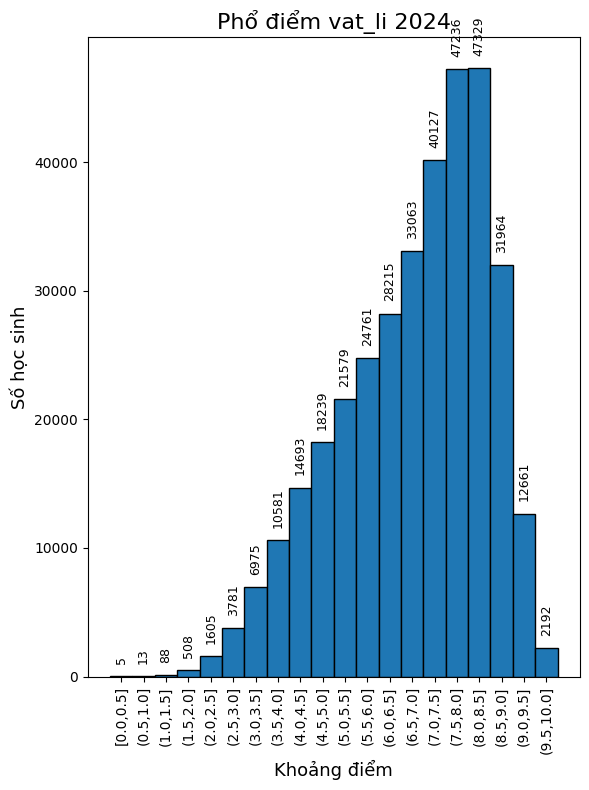

In [39]:
# 1. Mở rộng dữ liệu thô từ Series (index = điểm, values = số lượng)
points = np.repeat(ChoiceSubj_24.index.values, ChoiceSubj_24.values.astype(int))

# 2. Tạo edges để có khoảng: [0,0.5], (0.5,1], ..., (9.5,10]
# hist sẽ hiểu là [a,b) trừ bin cuối, nên mình dịch bin đầu hơi âm
edges = np.concatenate((
    np.array([-1e-6, 0.5]),   # ~ [0,0.5]
    np.arange(1, 10.5, 0.5)   # 1, 1.5, 2, ..., 10
))

# 3. Tạo edges để HIỂN THỊ (không để -1e-6 trong label)
display_edges = edges.copy()
display_edges[0] = 0.0   # hiển thị từ 0

# 4. Tạo label dạng [0,0.5], (0.5,1], ...
labels = []
labels.append(f"[{display_edges[0]},{display_edges[1]}]")   # bin đầu

for i in range(1, len(display_edges) - 1):
    labels.append(f"({display_edges[i]},{display_edges[i+1]}]")

# 5. Tính tần suất theo bins & vẽ BAR
plt.figure(figsize=(6, 8))

# Thay vì plt.hist → dùng np.histogram để tự vẽ bar
n, bin_edges = np.histogram(points, bins=edges)

# Tâm mỗi bin để đặt cột
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
widths = np.diff(bin_edges)

plt.bar(centers, n, width=widths, edgecolor="black")

plt.title(f"Phổ điểm {ChoiceSubj} 2024", fontsize=16)
plt.xlabel("Khoảng điểm", fontsize=13)
plt.ylabel("Số học sinh", fontsize=13)

# 6. Set tick theo tâm mỗi bin + label dạng [ ], ( ]
plt.xticks(centers, labels, rotation=90)

# 7. Ghi số lượng lên từng cột (xoay 90°, value nguyên)
for x, count in zip(centers, n):
    if count == 0:
        continue
    y = count
    plt.text(
        x,
        y + max(n) * 0.02,
        str(int(count)),
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


In [ ]:
print(ChoiceSubj_25.count)

<bound method Series.count of diem
0.00        7.0
0.10        1.0
0.35        2.0
0.40        4.0
0.45       10.0
          ...  
9.40       16.0
9.50     2517.0
9.60        3.0
9.75       40.0
10.00     513.0
Name: 2025, Length: 147, dtype: float64>


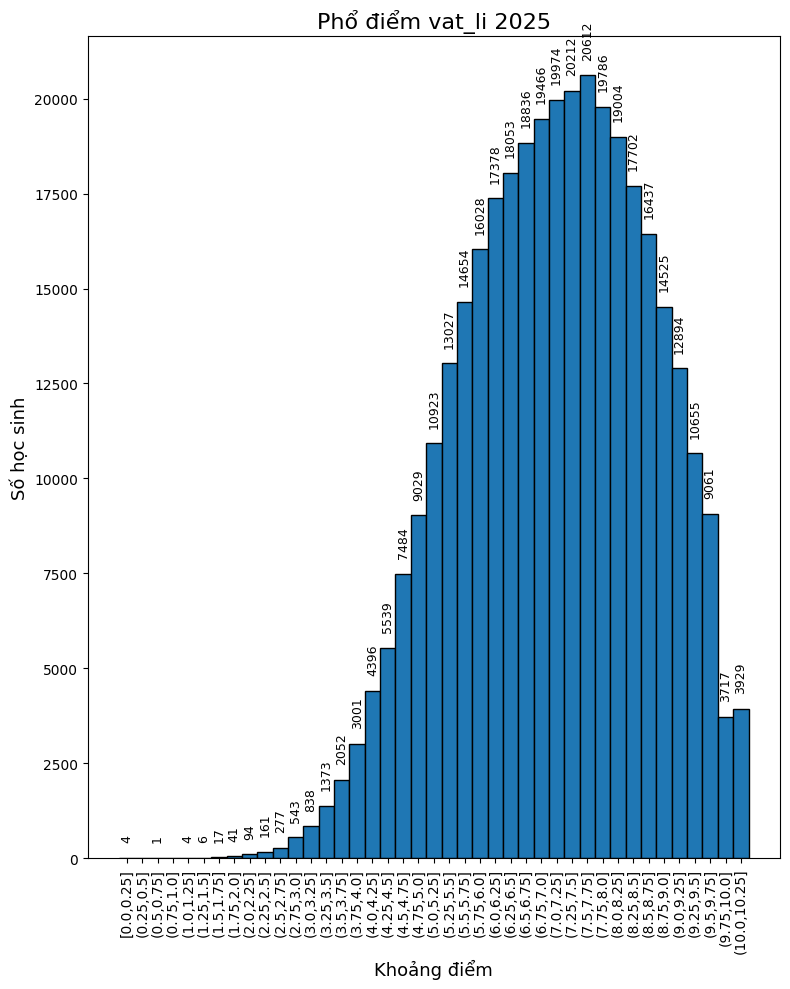

In [44]:
# 1. Mở rộng dữ liệu thô từ Series (index = điểm, values = số lượng)
points = np.repeat(ChoiceSubj_25.index.values, ChoiceSubj_25.values.astype(int))

# 2. Tạo edges để có khoảng: [0,0.5], (0.5,1], ..., (9.5,10]
# hist sẽ hiểu là [a,b) trừ bin cuối, nên mình dịch bin đầu hơi âm
edges = np.concatenate((
    np.array([-1e-6, 0.25]),   # ~ [0,0.5]
    np.arange(0.5, 10.5, 0.25)   # 1, 1.5, 2, ..., 10
))

# 3. Tạo edges để HIỂN THỊ (không để -1e-6 trong label)
display_edges = edges.copy()
display_edges[0] = 0.0   # hiển thị từ 0

# 4. Tạo label dạng [0,0.5], (0.5,1], ...
labels = []
labels.append(f"[{display_edges[0]},{display_edges[1]}]")   # bin đầu

for i in range(1, len(display_edges) - 1):
    labels.append(f"({display_edges[i]},{display_edges[i+1]}]")

# 5. Tính tần suất theo bins & vẽ BAR
plt.figure(figsize=(8, 10))

# Thay vì plt.hist → dùng np.histogram để tự vẽ bar
n, bin_edges = np.histogram(points, bins=edges)

# Tâm mỗi bin để đặt cột
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
widths = np.diff(bin_edges)

plt.bar(centers, n, width=widths, edgecolor="black")

plt.title(f"Phổ điểm {ChoiceSubj} 2025", fontsize=16)   # <-- đổi năm ở đây
plt.xlabel("Khoảng điểm", fontsize=13)
plt.ylabel("Số học sinh", fontsize=13)

# 6. Set tick theo tâm mỗi bin + label dạng [ ], ( ]
plt.xticks(centers, labels, rotation=90)

# 7. Ghi số lượng lên từng cột (xoay 90°, value nguyên)
for x, count in zip(centers, n):
    if count == 0:
        continue
    y = count
    plt.text(
        x,
        y + max(n) * 0.02,
        str(int(count)),
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


# Theo Tổ Hợp

In [26]:
# Xử lý data theo tổ hợp khối

# Theo Năm 

In [27]:
# Xử lý data qua từng năm